# Setup Up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [12]:
# Plot Figure Function
def plot(points, connections:list):
    fig = plt.figure()
    ax = fig.add_subplot()

    xx = points[:,0] # All x values of points
    yy = points[:,1] # All y values of points
    for con in connections:
        ax.add_line(lines.Line2D([xx[con[0]],xx[con[1]]],[yy[con[0]],yy[con[1]]]))

    ax.set_xlim(min(xx),max(xx))
    ax.set_ylim(min(yy),max(yy))
    plt.show()

# Problem 1

[[0, 1], [1, 2], [2, 3], [3, 0], [4, 5], [5, 6], [6, 7], [7, 4], [0, 4], [1, 5], [2, 6], [3, 7], [4, 8], [5, 8], [6, 8], [7, 8]]


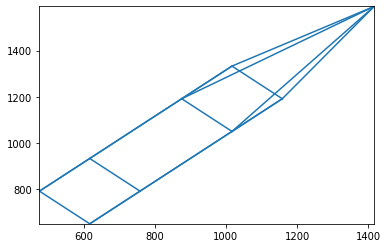

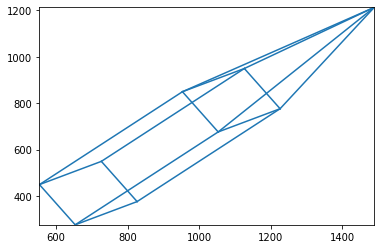

In [14]:
# Simple Object Points
points = np.array([[2,0,0],[4,0,0],[4,2,0],[2,2,0],[2,0,2],[4,0,2],[4,2,2],[2,2,2],[3,1,4]])

# connections is a list of tuples
# each tuple store 2 values
# one is list of corresponding x pair and otherthe y pair
connections = [[0,1],[1,2],[2,3],[3,0]] # base
connections.extend([[4,5],[5,6],[6,7],[7,4]]) # ceiling
connections.extend([[0,4],[1,5],[2,6],[3,7]]) # walls
connections.extend([[4,8],[5,8],[6,8],[7,8]]) # roof
print(connections)

K = np.array([[-100, 0, 200],[0, -100, 200],[0, 0 ,1]])

# Extrinsic Camera parameters
M_ext_left = np.array([[0.707, 0.707, 0, -3],[-0.707, 0.707, 0, -0.5],[0, 0, 1, 3]])
M_ext_right = np.array([[0.866, -0.5, 0, -3],[0.5, 0.866, 0, -0.5],[0, 0, 1, 3]])

pixels = np.zeros((9,3))
left_pixels = np.zeros((9,3))
right_pixels = np.zeros((9,3))
for i in range(9):
    pixels[i] = np.matmul((np.matmul(K,M_ext_left)),np.hstack((points[i],1)))
    left_pixels[i] = pixels[i]
    pixels[i] = np.matmul((np.matmul(K,M_ext_right)),np.hstack((points[i],1)))
    right_pixels[i] = pixels[i]

plot(left_pixels,connections)
plot(right_pixels,connections)

